### MNIST DIGIT CLASSIFICATION USING KERAS

### Nipul Agarwal
### Delhi Technological University
### Engineering Physics

In [1]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.initializers import RandomNormal
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
dataset=mnist.load_data()

In [3]:
(X_train,y_train),(X_test,y_test)=dataset

In [4]:
X_train.shape

(60000, 28, 28)

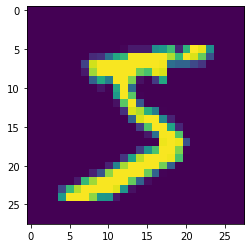

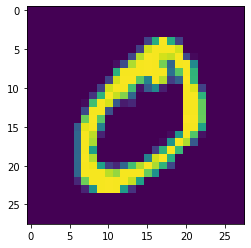

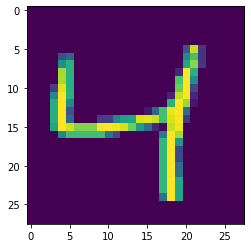

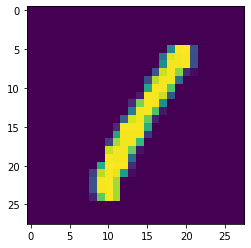

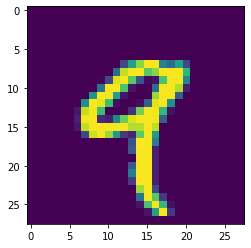

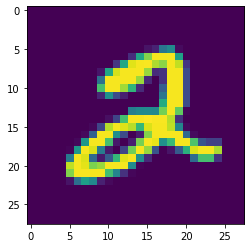

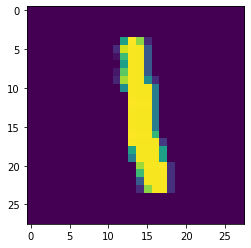

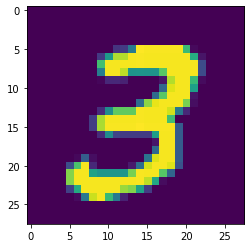

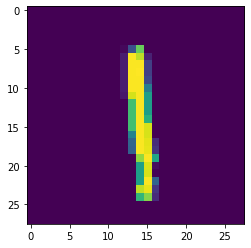

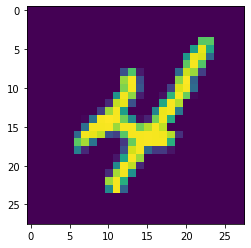

<Figure size 432x288 with 0 Axes>

In [5]:
for i in range(10):
    plt.imshow(X_train[i])
    plt.figure()
plt.show()

In [6]:
X_train.shape[0]

60000

In [7]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])

In [8]:
X_train=X_train/255
X_test=X_test/255

In [9]:
X_train[0].shape

(784,)

In [10]:
Y_train=np_utils.to_categorical(y_train,10)
Y_test=np_utils.to_categorical(y_test,10)

In [11]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [12]:
from keras.models import Sequential
from keras.layers import Dense,Activation

In [13]:
output_dim=10
input_dim=784
batch_size=128
epochs=20

In [14]:
model=Sequential()
model.add(Dense(output_dim,input_dim=input_dim,activation='softmax'))

In [15]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
history=model.fit(X_train,Y_train,batch_size=batch_size,epochs=epochs,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 47us/step - loss: 1.2879 - accuracy: 0.6895 - val_loss: 0.8149 - val_accuracy: 0.8331
Epoch 2/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.7186 - accuracy: 0.8385 - val_loss: 0.6097 - val_accuracy: 0.8610
Epoch 3/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.5890 - accuracy: 0.8581 - val_loss: 0.5278 - val_accuracy: 0.8734
Epoch 4/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.5267 - accuracy: 0.8678 - val_loss: 0.4815 - val_accuracy: 0.8789
Epoch 5/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.4889 - accuracy: 0.8751 - val_loss: 0.4512 - val_accuracy: 0.8851
Epoch 6/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.4627 - accuracy: 0.8796 - val_loss: 0.4298 - val_accuracy: 0.8888
Epoch 7/20
60000/60000 [==============================] - 3s 55us/st

In [17]:
pred=model.evaluate(X_test,Y_test)
print("Score",pred[0])
print("Accuracy",pred[1])

10000/10000 [==============================] - 0s 46us/step
Score 0.3360944743156433
Accuracy 0.9075999855995178


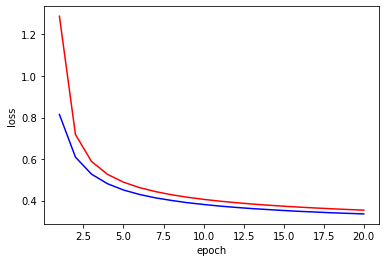

In [18]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')

x=list(range(1,epochs+1))

vy=history.history['val_loss']
ty=history.history['loss']

def plt_dynamic(x,y,y_1,ax,colors=['b']):
    ax.plot(x,y,'b',label='Train loss')
    ax.plot(x,y_1,'r',label='Test loss')
    if len(x)==1:
        plt.legend()
    fig.canvas.draw()
plt_dynamic(x,vy,ty,ax)

In [19]:
#Multilayer Perceptron
from keras.layers import BatchNormalization , Dropout 
model2=Sequential()
model2.add(Dense(512,activation='sigmoid',input_shape=(input_dim,)))#we can initialize weights as well using kernel_initialization
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Dense(128,activation='sigmoid'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Dense(output_dim,activation='softmax'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [20]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
history2=model2.fit(X_train,Y_train,batch_size=batch_size,epochs=epochs,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 16s 259us/step - loss: 0.4789 - accuracy: 0.8573 - val_loss: 0.2552 - val_accuracy: 0.9246
Epoch 2/20
60000/60000 [==============================] - 17s 282us/step - loss: 0.3190 - accuracy: 0.9040 - val_loss: 0.2159 - val_accuracy: 0.9367
Epoch 3/20
60000/60000 [==============================] - 18s 300us/step - loss: 0.2832 - accuracy: 0.9158 - val_loss: 0.1961 - val_accuracy: 0.9383
Epoch 4/20
60000/60000 [==============================] - 16s 267us/step - loss: 0.2562 - accuracy: 0.9230 - val_loss: 0.1700 - val_accuracy: 0.9479
Epoch 5/20
60000/60000 [==============================] - 15s 255us/step - loss: 0.2347 - accuracy: 0.9296 - val_loss: 0.1513 - val_accuracy: 0.9539
Epoch 6/20
60000/60000 [==============================] - 15s 251us/step - loss: 0.2163 - accuracy: 0.9353 - val_loss: 0.1363 - val_accuracy: 0.9591
Epoch 7/20
60000/60000 [==============================] 

In [22]:
pred2=model2.evaluate(X_test,Y_test)
print("Score",pred2[0])
print("Accuracy",pred2[1])

10000/10000 [==============================] - 1s 74us/step
Score 0.06451863189688883
Accuracy 0.9793999791145325


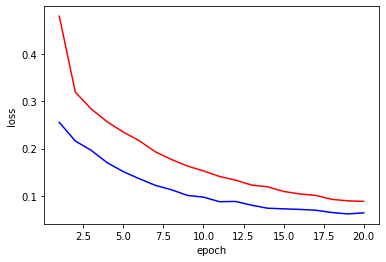

In [23]:
fig,ax=plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')

x=list(range(1,epochs+1))

vy=history2.history['val_loss']
ty=history2.history['loss']

plt_dynamic(x,vy,ty,ax)

In [24]:
weights=model2.get_weights()

In [25]:
print(weights[0].shape)
print(weights[2].shape)
print(weights[4].shape)

(784, 512)
(512,)
(512,)


In [26]:
def tune_hyperparameters(activ):
    m=Sequential()
    m.add(Dense(512,activation=activ,input_shape=(input_dim,)))#we can initialize weights as well using kernel_initialization
    m.add(BatchNormalization())
    m.add(Dropout(0.5))
    m.add(Dense(128,activation=activ))
    m.add(BatchNormalization())
    m.add(Dropout(0.5))
    m.add(Dense(output_dim,activation='softmax'))
    m.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return m
    

In [27]:
activ=['sigmoid','relu']

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

m=KerasClassifier(build_fn=tune_hyperparameters,epochs=epochs,batch_size=batch_size,verbose=0)

grid=GridSearchCV(estimator=m,param_grid={'activ':activ},n_jobs=-1,cv=3)
grid_result=grid.fit(X_train[:1000],Y_train[:1000])

In [28]:
print(grid_result.best_score_," ",grid_result.best_params_)

0.8419737021128336   {'activ': 'relu'}


In [29]:
grid_result.cv_results_['mean_test_score']

array([0.64495333, 0.8419737 ])